# 우리의 목표:
> ** 배에 타는 승객의 정보를 입력하면 배사고가 났을 때 생존여부를 예측해주는 모델을 만들어보자


## 작업환경설정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 17,8
rcParams['font.family'] = 'AppleGothic' #malgun Gothic


#워닝사인은 무시해도 되나 없앰
import warnings
warnings.filterwarnings('ignore')

from google.colab import files     #colab 돌릴때 파일업로드
uploaded = files.upload()          #colab 돌릴때 파일업로드

Saving gender_submission.csv to gender_submission.csv
Saving titanic_test.csv to titanic_test.csv
Saving titanic_train.csv to titanic_train.csv


In [132]:
test =  pd.read_csv('titanic_test.csv', index_col=0)
print(test.shape)
test.head()
test.info()

(418, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [133]:
train = pd.read_csv('titanic_train.csv')
print(train.shape)
train.head()
train.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [134]:
#오토인덱스를 해버리는데.... 
#read_csv시프트 탭키로 인덱스 컬럼을 지정해주는 파라메타가 있음   , index_col

In [135]:
train = pd.read_csv('titanic_train.csv', index_col="PassengerId")
print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [136]:
# 머신러닝은 null값이나 object는   채워주거나  데이터 타입을 바꿔줘야함 인티저/플롯

In [137]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [138]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [139]:
train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [140]:
test.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


### 탐색적분석(EDA) + 데이터 전처리  를 잘 해줘야만   머신러닝이 잘 돌아감
### - Feature Selection(데이터를 선택적으로 학습시키기 위해)
예를 들면... 캐빈 넘버의 경우 필요한 정보가 아닌데 중요정보로 인식하여 쓰레기를 학습 할 수 있음
### - Feature Engineering (특성공학)   ★★★
한단계 더 나아가 특정 컬럼을 연결하여 유의미한 정보를 만들어서 그 정보까지 학습시키면 훨씬 효과가 좋아짐

In [141]:
#카테고리 분석   seaborn에 ....
# 생존을 확인하기 위해 0번중요,
#일단 객실별 생존여부 관계 분석

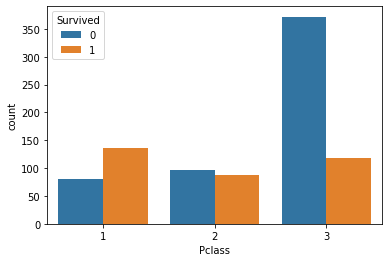

In [142]:
sns.countplot(data=train, x="Pclass", hue="Survived")

In [143]:
# 그래프와 같이 매우 연관성있음

In [144]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


In [145]:
train.Embarked.notnull().value_counts()

True     889
False      2
Name: Embarked, dtype: int64

In [146]:
train[train.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN



# 타이타닉 인물에 관한 사항 조사[링크 텍스트]
Mrs Stone boarded the Titanic in **Southampton** on 10 April 1912 and was travelling in first class with her maid Amelie Icard. She occupied cabin B-28.

(https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html)

In [147]:
train.Embarked.fillna("S", inplace=True)          #시간상 추가 컬럼 아닌 직접 처리하기로함

In [148]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


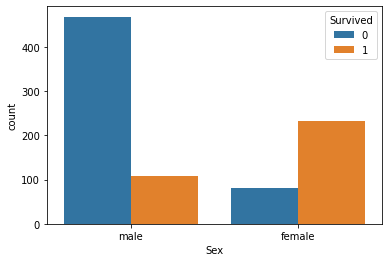

In [149]:
sns.countplot(data=train, x="Sex", hue="Survived")

In [150]:
# 우선 성별도 의미가 있다고 보여짐

In [151]:
# 나이의 경우 연속적  숫자로 구성되어    카운트플롯이 아닌 다른 그래프로 그려야함. 

In [152]:
# SibSp 함께 탑승한 형제 또는 배우자 수    , Parch : 부모 자식 명 수의 총 합

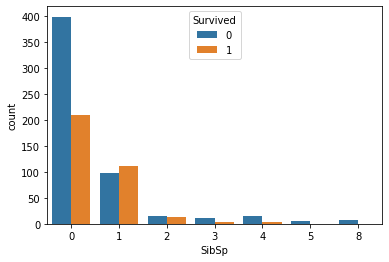

In [153]:
sns.countplot(data=train, x="SibSp", hue="Survived")

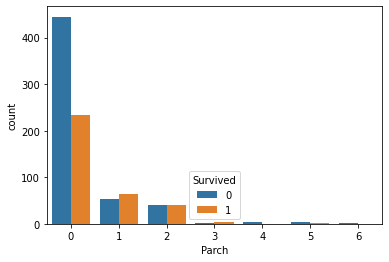

In [154]:
sns.countplot(data=train, x="Parch", hue="Survived")

In [155]:
# 동행수가 많다고해서 생존률이 높은 것은 아니다
# family 컬럼과, 동승여부 컬럼을 만들어봄

In [156]:
# 없는 컬럼을 만듦

test["Fsize"] = test.SibSp + test.Parch

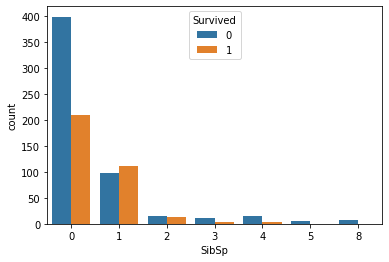

In [157]:
sns.countplot(data=train, x="SibSp", hue="Survived")

In [158]:
test["SibSp_level"] = test.SibSp

test.loc[test.SibSp_level ==0, 'SibSp_level'] = 1
test.loc[test.SibSp_level ==1, 'SibSp_level'] = 2
test.loc[test.SibSp_level ==2, 'SibSp_level'] = 2
test.loc[test.SibSp_level ==3, 'SibSp_level'] = 3
test.loc[test.SibSp_level ==4, 'SibSp_level'] = 3
test.loc[test.SibSp_level ==5, 'SibSp_level'] = 4
test.loc[test.SibSp_level ==8, 'SibSp_level'] = 4

In [159]:
train["SibSp_level"] = train.SibSp

train.loc[train.SibSp_level ==0, 'SibSp_level'] = 1
train.loc[train.SibSp_level ==1, 'SibSp_level'] = 2
train.loc[train.SibSp_level ==2, 'SibSp_level'] = 2
train.loc[train.SibSp_level ==3, 'SibSp_level'] = 3
train.loc[train.SibSp_level ==4, 'SibSp_level'] = 3
train.loc[train.SibSp_level ==5, 'SibSp_level'] = 4
train.loc[train.SibSp_level ==8, 'SibSp_level'] = 4

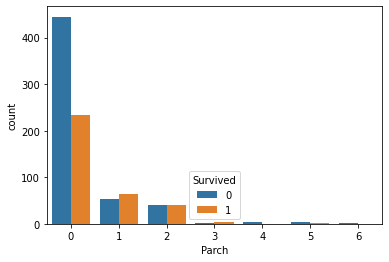

In [160]:
sns.countplot(data=train, x="Parch", hue="Survived")

In [161]:
test["Parch_level"] = test.Parch


test.loc[test.Parch_level ==0, 'Parch_level'] = 1
test.loc[test.Parch_level ==1, 'Parch_level'] = 2
test.loc[test.Parch_level ==2, 'Parch_level'] = 2
test.loc[test.Parch_level ==3, 'Parch_level'] = 2
test.loc[test.Parch_level ==4, 'Parch_level'] = 4
test.loc[test.Parch_level ==5, 'Parch_level'] = 3
test.loc[test.Parch_level ==6, 'Parch_level'] = 4

In [162]:
train["Parch_level"] = train.Parch


train.loc[train.Parch_level ==0, 'Parch_level'] = 1
train.loc[train.Parch_level ==1, 'Parch_level'] = 2
train.loc[train.Parch_level ==2, 'Parch_level'] = 2
train.loc[train.Parch_level ==3, 'Parch_level'] = 2
train.loc[train.Parch_level ==4, 'Parch_level'] = 4
train.loc[train.Parch_level ==5, 'Parch_level'] = 3
train.loc[train.Parch_level ==6, 'Parch_level'] = 4

In [163]:
# 없는 컬럼을 만듦

train["Fsize"] = train.SibSp + train.Parch

In [164]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_level,Parch_level,Fsize
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,2,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,2,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,2,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,2,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,2,0


In [165]:
test.loc[test.Fsize ==0, 'Alone'] = 1
test.loc[test.Fsize !=0, 'Alone'] = 0

In [166]:
train.loc[train.Fsize ==0, 'Alone'] = 1
train.loc[train.Fsize !=0, 'Alone'] = 0

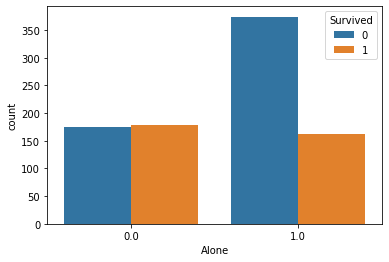

In [167]:
sns.countplot(data=train, x="Alone", hue="Survived")

In [168]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_level,Parch_level,Fsize,Alone
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,2,1,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,2,1,0.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,2,0,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,2,1,0.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,2,0,1.0


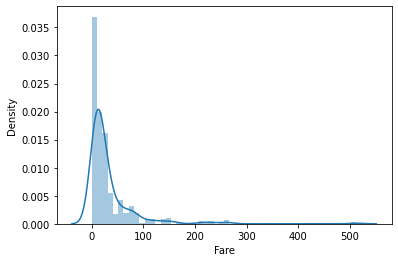

In [169]:
sns.distplot(train.Fare)

# 500불에 대한 분석
> ** Q. Fare를 500불 이상 낸 승객들을 찾아주세요 **

In [170]:
train.loc[train.Fare >= 500]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_level,Parch_level,Fsize,Alone
PassengerId,,,,,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,2,2,0,1.0
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,2,2,1,0.0
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,2,2,0,1.0


In [171]:
# 요금이 동일티켓에 동일금액으로,  잘못된 입력값인지 찾는 것도 필요함

In [172]:
test.loc[test.Fare >=500, 'Fare'] = 512/3

In [173]:
train.loc[train.Fare >= 500, 'Fare'] = 512/3

In [174]:
train.loc[train.Fare >= 300]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_level,Parch_level,Fsize,Alone
PassengerId,,,,,,,,,,,,,,,


In [175]:
train.loc[train.Fare >= 250]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_level,Parch_level,Fsize,Alone
PassengerId,,,,,,,,,,,,,,,
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.000,C23 C25 C27,S,3,2,5,0.0
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.000,C23 C25 C27,S,3,2,5,0.0
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C,2,2,4,0.0
342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.000,C23 C25 C27,S,3,2,5,0.0
439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.000,C23 C25 C27,S,2,4,5,0.0
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C,2,2,4,0.0


In [176]:
survivor = train[train.Survived ==1]
perish = train[train.Survived ==0]

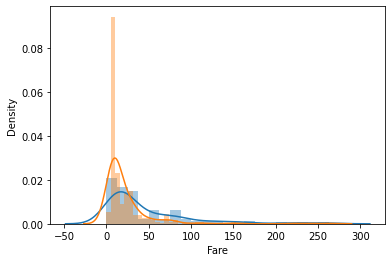

In [177]:
sns.distplot(survivor.Fare)
sns.distplot(perish.Fare)

## lmplot
 - 신규 데이터의 조합이 매우 중요.
 - 나이는 크게 중요하지 않지만 조합에 따라 중요해질 수 있음.


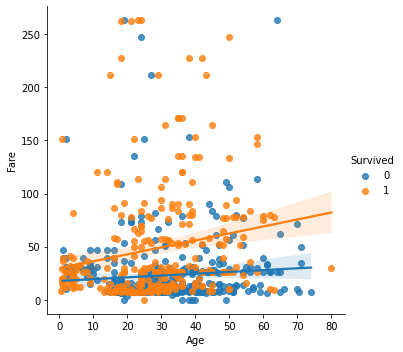

In [178]:
sns.lmplot(data=train, x="Age", y="Fare", hue="Survived")

In [179]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_level,Parch_level,Fsize,Alone
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,2,1,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,2,1,0.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,2,0,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,2,1,0.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,2,0,1.0


In [180]:
# 캐빈넘버의 경우, 있는 사람과 없는 사람을 나누어 줌

In [181]:
train.Cabin.isnull().sum() / train.shape[0]

0.7710437710437711

In [182]:
test.loc[test.Cabin.isnull(), 'Cabin_encode'] = 0
test.loc[test.Cabin.notnull(), 'Cabin_encode'] = 1


In [183]:
train.loc[train.Cabin.isnull(), 'Cabin_encode']=0
train.loc[train.Cabin.notnull(), 'Cabin_encode']=1

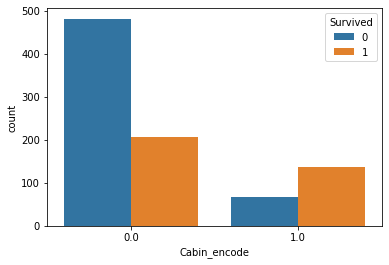

In [184]:
sns.countplot(data=train, x='Cabin_encode', hue="Survived")

In [185]:
train[train.Cabin.notnull()].Pclass.value_counts()     # 이미 1등석이 캐빈넘거가 많이 기록되어있어 추가한다고 영향을 많이 주지 않음

1    176
2     16
3     12
Name: Pclass, dtype: int64

In [186]:
train.Name.sample(30)

PassengerId
614                                     Horgan, Mr. John
747                          Abbott, Mr. Rossmore Edward
769                                  Moran, Mr. Daniel J
492                                  Windelov, Mr. Einar
290                                 Connolly, Miss. Kate
339                                Dahl, Mr. Karl Edwart
874                          Vander Cruyssen, Mr. Victor
508        Bradley, Mr. George ("George Arthur Brayton")
842                             Mudd, Mr. Thomas Charles
685                    Brown, Mr. Thomas William Solomon
342                       Fortune, Miss. Alice Elizabeth
319                             Wick, Miss. Mary Natalie
813                            Slemen, Mr. Richard James
803                  Carter, Master. William Thornton II
242                       Murphy, Miss. Katherine "Kate"
890                                Behr, Mr. Karl Howell
637                           Leinonen, Mr. Antti Gustaf
446                

- Master  유럽귀족의 젊은 남자...
# 호칭을 잘라내는 함수

In [187]:
def find_title(name):
    
    return name.split(', ')[1].split('.')[0]


In [188]:
test['Title'] = test.Name.apply(find_title)

In [189]:
train['Title']= train.Name.apply(find_title)

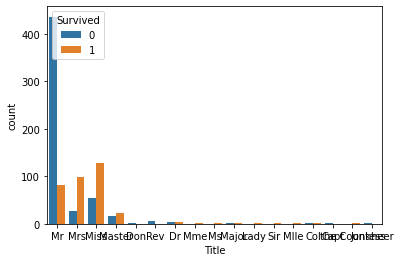

In [190]:
sns.countplot(data=train, x='Title', hue="Survived")

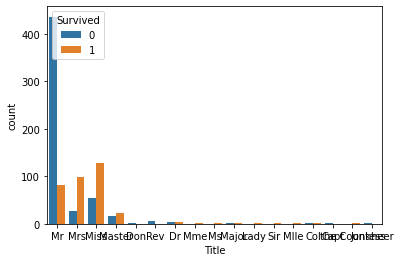

In [191]:
sns.countplot(data=train, x='Title', hue="Survived")

> **Q. Master라는 컬럼을 만들어 주세요, 해당승객이 마스터면, 1로기록, 아니면 0으로 채워주세요

In [192]:
test.loc[test.Title =="Master", "Master"] = 1
test.loc[test.Title !="Master", "Master"] = 0

In [193]:
train.loc[train.Title =="Master", "Master"] = 1
train.loc[train.Title !="Master", "Master"] = 0

> ** Mrs와 Miss의 경우도 나이 차이가 분명히 날 것이므로 추가적으로 분리해보기로 함

In [194]:

test.loc[test.Title =="Mrs", "Mrs"] = "1"
test.loc[test.Title !="Mrs", "Mrs"] = "0"
train.loc[train.Title =="Mrs", "Mrs"] = "1"
train.loc[train.Title !="Mrs", "Mrs"] = "0"


test.loc[test.Title =="Miss", "Miss"] = "1"
test.loc[test.Title !="Miss", "Miss"] = "0"
train.loc[train.Title =="Miss", "Miss"] = "1"
train.loc[train.Title !="Miss", "Miss"] = "0"


test.loc[test.Title =="Man", "Man"] = "1"
test.loc[test.Title !="Man", "Man"] = "0"
train.loc[train.Title =="Man", "Man"] = "1"
train.loc[train.Title !="Man", "Man"] = "0"

# Embarked

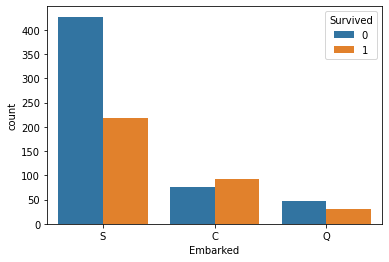

In [195]:
sns.countplot(data=train, x="Embarked", hue="Survived")

> ** Q. Embarkded 컬럼을 원핫인코딩해주세요 ,   E_S, E_C, E_Q라는 컬럼을 만들어주세요

In [196]:
embarked = pd.get_dummies(test.Embarked, prefix="Embarked")
test = pd.concat([test, embarked], axis=1)

In [197]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Alone,Cabin_encode,Title,Master,Mrs,Miss,Man,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,...,1.0,0.0,Mr,0.0,0,0,0,0,1,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,...,0.0,0.0,Mrs,0.0,1,0,0,0,0,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,...,1.0,0.0,Mr,0.0,0,0,0,0,1,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,...,1.0,0.0,Mr,0.0,0,0,0,0,0,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,...,0.0,0.0,Mrs,0.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,...,1.0,0.0,Mr,0.0,0,0,0,0,0,1
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,...,1.0,1.0,Dona,0.0,0,0,0,1,0,0
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,...,1.0,0.0,Mr,0.0,0,0,0,0,0,1


In [198]:
embarked = pd.get_dummies(train.Embarked, prefix="Embarked")
train = pd.concat([train, embarked], axis=1)
train.head()
embarked

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1
...,...,...,...
887,0,0,1
888,0,0,1
889,0,0,1


In [199]:
test.loc[test.Sex=='male', 'Sex_encode'] = 0
test.loc[test.Sex=='female', 'Sex_encode'] = 1


In [200]:
train.loc[train.Sex=='male', 'Sex_encode']=0
train.loc[train.Sex=='female', 'Sex_encode']=1

In [201]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Cabin_encode,Title,Master,Mrs,Miss,Man,Embarked_C,Embarked_Q,Embarked_S,Sex_encode
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,0.0,Mr,0.0,0,0,0,0,0,1,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,1.0,Mrs,0.0,1,0,0,1,0,0,1.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0.0,Miss,0.0,0,1,0,0,0,1,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,1.0,Mrs,0.0,1,0,0,0,0,1,1.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,0.0,Mr,0.0,0,0,0,0,0,1,0.0


In [202]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        418 non-null    int64  
 1   Name          418 non-null    object 
 2   Sex           418 non-null    object 
 3   Age           332 non-null    float64
 4   SibSp         418 non-null    int64  
 5   Parch         418 non-null    int64  
 6   Ticket        418 non-null    object 
 7   Fare          417 non-null    float64
 8   Cabin         91 non-null     object 
 9   Embarked      418 non-null    object 
 10  Fsize         418 non-null    int64  
 11  SibSp_level   418 non-null    int64  
 12  Parch_level   418 non-null    int64  
 13  Alone         418 non-null    float64
 14  Cabin_encode  418 non-null    float64
 15  Title         418 non-null    object 
 16  Master        418 non-null    float64
 17  Mrs           418 non-null    object 
 18  Miss          418 non-null 

In [203]:
train.Age.isnull().sum() / train.shape[0]

0.19865319865319866

In [204]:
train.Age.mean()

29.69911764705882

In [205]:
train[train.Pclass==1].Age.mean()

38.233440860215055

In [206]:
train[train.Pclass==2].Age.mean()

29.87763005780347

In [207]:
train[train.Pclass==3].Age.mean()

25.14061971830986

> ** Q. Pclass와 성별을 둘다 고려해서 평균나이를 찾아주세요, 예를 1등석 남자의 평균, 2등석 여자의 평균은 다를까?

In [208]:
train[(train.Sex=='female')&(train.Pclass==1)].Age.mean()

34.61176470588235

In [209]:
train[(train.Sex=='female')&(train.Pclass==2)].Age.mean()

28.722972972972972

In [210]:
train[(train.Sex=='female')&(train.Pclass==3)].Age.mean()

21.75

In [211]:
train[(train.Sex=='male')&(train.Pclass==1)].Age.mean()

41.28138613861386

In [212]:
train[(train.Sex=='male')&(train.Pclass==2)].Age.mean()

30.74070707070707

In [213]:
train[(train.Sex=='male')&(train.Pclass==3)].Age.mean()

26.507588932806325

> ** 호칭에 따른 나이를 추가 구분해 봄

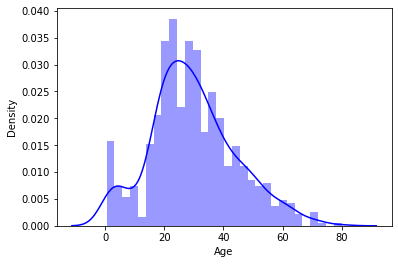

In [214]:
sns.distplot(train["Age"], color="blue", label="Age", bins=30)

In [215]:
train[train.Age.isnull()].describe()


,Survived,Pclass,Age,SibSp,Parch,Fare,SibSp_level,Parch_level,Fsize,Alone,Cabin_encode,Master,Embarked_C,Embarked_Q,Embarked_S,Sex_encode
count,177.000000,177.000000,0.0,177.000000,177.000000,177.000000,177.000000,177.0,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,0.293785,2.598870,NaN,0.564972,0.180791,22.158567,2.101695,2.0,0.745763,0.751412,0.107345,0.022599,0.214689,0.276836,0.508475,0.299435
std,0.456787,0.763216,NaN,1.626316,0.534145,31.874608,0.414026,0.0,2.052658,0.433420,0.310429,0.149042,0.411771,0.448704,0.501346,0.459310
min,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,2.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,NaN,0.000000,0.000000,7.750000,2.000000,2.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,NaN,0.000000,0.000000,8.050000,2.000000,2.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,3.000000,NaN,0.000000,0.000000,24.150000,2.000000,2.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,3.000000,NaN,8.000000,2.000000,227.525000,4.000000,2.0,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [216]:
train[train.Age.isnull()].describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked,Title,Mrs,Miss,Man
count,177,177,177,19,177,177,177,177,177
unique,177,2,155,19,3,5,2,2,1
top,"Moran, Mr. James",male,CA. 2343,B78,S,Mr,0,0,0
freq,1,124,7,1,90,119,160,141,177


Text(0.5, 1.0, 'Test Set')

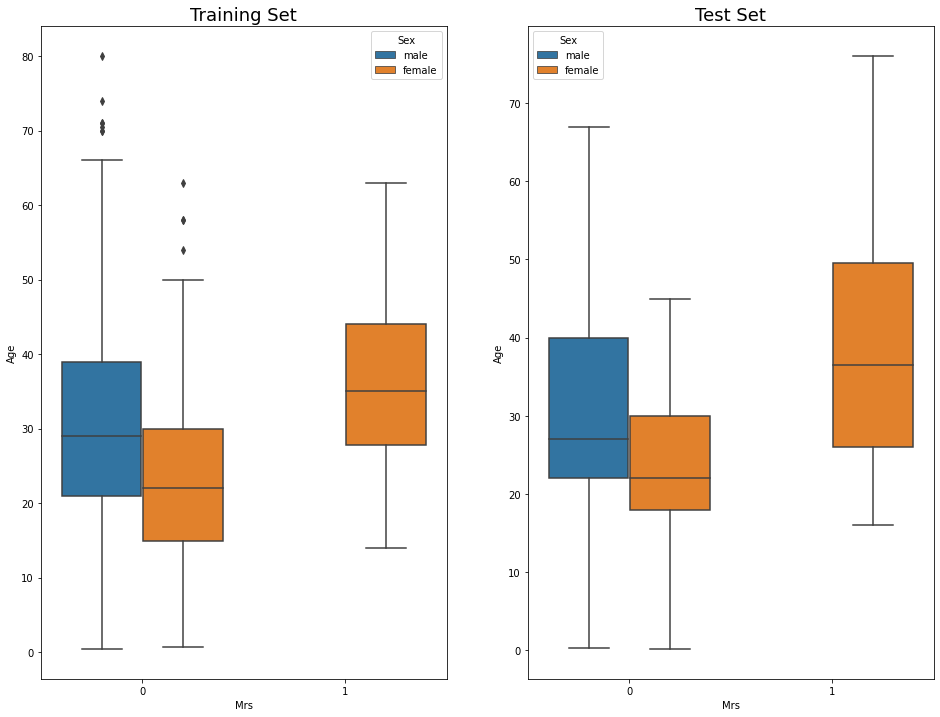

In [217]:
fig, ax = plt.subplots(figsize=(16,12),ncols=2)
ax1 = sns.boxplot(x="Mrs", y="Age", hue="Sex", data=train, ax = ax[0]);
ax2 = sns.boxplot(x="Mrs", y="Age", hue="Sex", data=test, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 18)
ax2.set_title('Test Set',  fontsize = 18)

In [218]:
train[(train.Mrs == "1")].Age.mean()

35.898148148148145

In [219]:
test[(test.Mrs == "1")].Age.mean()

38.903225806451616

In [220]:
Ageconcat = pd.concat([train, test], ignore_index=True) 

In [221]:
Ageconcat[(Ageconcat.Mrs == "1")].Age.mean()

36.99411764705882

In [222]:
train[(train.Miss == "1")].Age.mean()

21.773972602739725

In [223]:
test[(test.Miss == "1")].Age.mean()

21.774843750000002

* 마스터나이 먼저 처리
 - 어린 남성으로 분류 되므로

In [224]:
train.groupby('Master')['Age'].mean()
# sns.countplot(data=train, x='Age', hue="Master")

Master
0.0    31.033186
1.0     4.574167
Name: Age, dtype: float64

In [225]:
train.loc[(train.Age.isnull())&(train.Master=='1'),'Age']=4.57

* 그 다음 Mrs, Miss의 평균나이를  채워보기로 한다.


In [226]:
train_MissAge = train[(train.Miss == "1")].Age.mean()
test_MissAge = test[(test.Miss == "1")].Age.mean()

#train_MrsAge = train[(train.Mrs == "1")].Age.mean()
#test_MrsAge = test[(test.Mrs == "1")].Age.mean()
concatMrsAge = Ageconcat[(Ageconcat.Mrs == "1")].Age.mean()

In [227]:
train.loc[(train.Age.isnull())
          &(train.Miss=='1'),'Age'] = train_MissAge

test.loc[(test.Age.isnull())
          &(train.Miss=='1'),'Age'] = test_MissAge

train.loc[(train.Age.isnull())
          &(train.Mrs=='1'),'Age'] = concatMrsAge

test.loc[(test.Age.isnull())
          &(train.Mrs=='1'),'Age'] = concatMrsAge

In [228]:
train[train.Age.isnull()].describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked,Title,Mrs,Miss,Man
count,124,124,124,12,124,124,124,124,124
unique,124,1,115,12,3,3,1,1,1
top,"Moran, Mr. James",male,CA. 2343,C52,S,Mr,0,0,0
freq,1,124,4,1,73,119,124,124,124


In [229]:
m1=train[(train.Sex=='male')&(train.Pclass==1)].Age.mean()
f1=train[(train.Sex=='female')&(train.Pclass==1)].Age.mean()
m2=train[(train.Sex=='male')&(train.Pclass==2)].Age.mean()
f2=train[(train.Sex=='female')&(train.Pclass==2)].Age.mean()
m3=train[(train.Sex=='male')&(train.Pclass==3)].Age.mean()
f3=train[(train.Sex=='female')&(train.Pclass==3)].Age.mean()

In [230]:
test.loc[(test.Age.isnull())
          &(test.Sex=='male')
          &(test.Pclass==1), 'Age'] = m1
test.loc[(test.Age.isnull())
          &(test.Sex=='female')
          &(test.Pclass==1), 'Age'] = f1
test.loc[(test.Age.isnull())
          &(test.Sex=='male')
          &(test.Pclass==2), 'Age'] = m2
test.loc[(test.Age.isnull())
          &(test.Sex=='female')
          &(test.Pclass==2), 'Age'] = f2
test.loc[(test.Age.isnull())
          &(test.Sex=='male')
          &(test.Pclass==3), 'Age'] = m3
test.loc[(test.Age.isnull())
          &(test.Sex=='female')
          &(test.Pclass==3), 'Age'] = f3

In [231]:
train.loc[(train.Age.isnull())
          &(train.Sex=='male')
          &(train.Pclass==1),'Age'] = m1
train.loc[(train.Age.isnull())
          &(train.Sex=='female')
          &(train.Pclass==1),'Age'] = f1
train.loc[(train.Age.isnull())
          &(train.Sex=='male')
          &(train.Pclass==2),'Age'] = m2
train.loc[(train.Age.isnull())
          &(train.Sex=='female')
          &(train.Pclass==2),'Age'] = f2
train.loc[(train.Age.isnull())
          &(train.Sex=='male')
          &(train.Pclass==3),'Age'] = m3
train.loc[(train.Age.isnull())
          &(train.Sex=='female')
          &(train.Pclass==3),'Age'] = f3

In [232]:
train.Age.isnull().sum()

0

In [233]:
train.sort_values(by='Age', ascending=True).head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Cabin_encode,Title,Master,Mrs,Miss,Man,Embarked_C,Embarked_Q,Embarked_S,Sex_encode
PassengerId,,,,,,,,,,,,,,,,,,,,,
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,...,0.0,Master,1.0,0,0,0,1,0,0,0.0
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,...,0.0,Master,1.0,0,0,0,0,0,1,0.0
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,...,0.0,Miss,0.0,0,1,0,1,0,0,1.0
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,...,0.0,Miss,0.0,0,1,0,1,0,0,1.0
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,...,0.0,Master,1.0,0,0,0,0,0,1,0.0
832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,...,0.0,Master,1.0,0,0,0,0,0,1,0.0
306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,...,1.0,Master,1.0,0,0,0,0,0,1,0.0
382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,2653,15.7417,NaN,...,0.0,Miss,0.0,0,1,0,1,0,0,1.0
387,0,3,"Goodwin, Master. Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,NaN,...,0.0,Master,1.0,0,0,0,0,0,1,0.0


### 상관관계 분석

In [234]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,SibSp_level,Parch_level,Fsize,Alone,Cabin_encode,Master,Embarked_C,Embarked_Q,Embarked_S,Sex_encode
Survived,1.000000,-0.338481,-0.061462,-0.035322,0.081629,0.270353,-0.118877,-0.065881,0.016639,-0.203367,0.316912,0.085221,0.168240,0.003650,-0.149683,0.543351
Pclass,-0.338481,1.000000,-0.397280,0.083081,0.018443,-0.608669,0.150038,0.051341,0.065997,0.135207,-0.725541,0.082081,-0.243292,0.221009,0.074053,-0.131900
Age,-0.061462,-0.397280,1.000000,-0.250395,-0.179026,0.123143,-0.250375,0.099336,-0.260575,0.173624,0.266670,-0.370285,0.051903,-0.084702,0.007834,-0.097799
SibSp,-0.035322,0.083081,-0.250395,1.000000,0.414838,0.202377,0.864934,0.019277,0.890712,-0.584471,-0.040460,0.349559,-0.059528,-0.026354,0.068734,0.114631
Parch,0.081629,0.018443,-0.179026,0.414838,1.000000,0.258082,0.347313,0.528948,0.783111,-0.583398,0.036987,0.267344,-0.011069,-0.081228,0.060814,0.245489
Fare,0.270353,-0.608669,0.123143,0.202377,0.258082,1.000000,0.119170,0.075660,0.267251,-0.325976,0.543109,0.018893,0.262436,-0.130566,-0.147740,0.217338
SibSp_level,-0.118877,0.150038,-0.250375,0.864934,0.347313,0.119170,1.000000,-0.022192,0.764665,-0.270585,-0.092671,0.354804,-0.105902,-0.013647,0.101362,0.036156
Parch_level,-0.065881,0.051341,0.099336,0.019277,0.528948,0.075660,-0.022192,1.000000,0.277429,-0.124415,-0.022990,-0.021900,-0.048694,-0.007101,0.047127,0.066450
Fsize,0.016639,0.065997,-0.260575,0.890712,0.783111,0.267251,0.764665,0.277429,1.000000,-0.690922,-0.009175,0.372472,-0.046215,-0.058592,0.077359,0.200988
Alone,-0.203367,0.135207,0.173624,-0.584471,-0.583398,-0.325976,-0.270585,-0.124415,-0.690922,1.000000,-0.158029,-0.267024,-0.095298,0.086464,0.029074,-0.303646


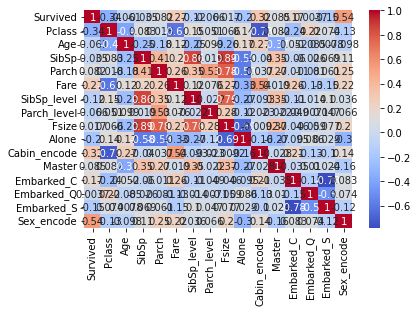

In [235]:
sns.heatmap(train.corr(), annot=True, cmap = 'coolwarm')

In [236]:
train.corrwith(train.Survived).sort_values()

Pclass         -0.338481
Alone          -0.203367
Embarked_S     -0.149683
SibSp_level    -0.118877
Parch_level    -0.065881
Age            -0.061462
SibSp          -0.035322
Embarked_Q      0.003650
Fsize           0.016639
Parch           0.081629
Master          0.085221
Embarked_C      0.168240
Fare            0.270353
Cabin_encode    0.316912
Sex_encode      0.543351
Survived        1.000000
dtype: float64

In [237]:
# 수업 기본형

# features = ["Sex_encode", 'Pclass', 'Alone', 
#            "Embarked_C", 'Embarked_Q', "Embarked_S",
#            "Age", "Master", 'Fare']

In [238]:
features = ["Sex_encode", "Pclass", "Alone", 
           "Embarked_C", 'Embarked_Q', "Embarked_S",
           "Age", "Master", "Miss","Mrs","Fare","Parch_level", "SibSp_level"]

In [239]:
X_test = test[features]

In [240]:
X_train = train[features]

In [241]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sex_encode   418 non-null    float64
 1   Pclass       418 non-null    int64  
 2   Alone        418 non-null    float64
 3   Embarked_C   418 non-null    uint8  
 4   Embarked_Q   418 non-null    uint8  
 5   Embarked_S   418 non-null    uint8  
 6   Age          418 non-null    float64
 7   Master       418 non-null    float64
 8   Miss         418 non-null    object 
 9   Mrs          418 non-null    object 
 10  Fare         417 non-null    float64
 11  Parch_level  418 non-null    int64  
 12  SibSp_level  418 non-null    int64  
dtypes: float64(5), int64(3), object(2), uint8(3)
memory usage: 53.3+ KB


In [242]:
X_test.sort_values(by='Fare', ascending=False) 

,Sex_encode,Pclass,Alone,Embarked_C,Embarked_Q,Embarked_S,Age,Master,Miss,Mrs,Fare,Parch_level,SibSp_level
PassengerId,,,,,,,,,,,,,
961,1.0,1,0.0,0,0,1,60.000000,0.0,0,1,263.0000,4,2
945,1.0,1,0.0,0,0,1,28.000000,0.0,1,0,263.0000,2,3
916,1.0,1,0.0,1,0,0,48.000000,0.0,0,1,262.3750,2,2
1034,0.0,1,0.0,1,0,0,61.000000,0.0,0,0,262.3750,2,2
951,1.0,1,1.0,1,0,0,36.000000,0.0,1,0,262.3750,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,0.0,3,0.0,1,0,0,26.507589,0.0,0,0,6.4375,2,2
913,0.0,3,0.0,0,0,1,9.000000,1.0,0,0,3.1708,2,2
1158,0.0,1,1.0,0,0,1,41.281386,0.0,0,0,0.0000,2,2


In [243]:
test.sort_values(by='Fare', ascending=False) 

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Cabin_encode,Title,Master,Mrs,Miss,Man,Embarked_C,Embarked_Q,Embarked_S,Sex_encode
PassengerId,,,,,,,,,,,,,,,,,,,,,
961,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.000000,1,4,19950,263.0000,C23 C25 C27,S,...,1.0,Mrs,0.0,1,0,0,0,0,1,1.0
945,1,"Fortune, Miss. Ethel Flora",female,28.000000,3,2,19950,263.0000,C23 C25 C27,S,...,1.0,Miss,0.0,0,1,0,0,0,1,1.0
916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.000000,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,...,1.0,Mrs,0.0,1,0,0,1,0,0,1.0
1034,1,"Ryerson, Mr. Arthur Larned",male,61.000000,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,...,1.0,Mr,0.0,0,0,0,1,0,0,0.0
951,1,"Chaudanson, Miss. Victorine",female,36.000000,0,0,PC 17608,262.3750,B61,C,...,1.0,Miss,0.0,0,1,0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,3,"Thomas, Mr. Charles P",male,26.507589,1,0,2621,6.4375,NaN,C,...,0.0,Mr,0.0,0,0,0,1,0,0,0.0
913,3,"Olsen, Master. Artur Karl",male,9.000000,0,1,C 17368,3.1708,NaN,S,...,0.0,Master,1.0,0,0,0,0,0,1,0.0
1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,41.281386,0,0,112051,0.0000,NaN,S,...,0.0,Mr,0.0,0,0,0,0,0,1,0.0


In [244]:
train.loc[train.Pclass==3].Fare.mean()

13.675550101832997

In [245]:
test.loc[test.Pclass==3].Fare.mean()

12.459677880184334

In [246]:
X_test.loc[X_test.Fare.isnull(), 'Fare'] = 13.0000

In [247]:
y_train = train.Survived

In [248]:
y_train.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

머신러닝의 처리 개념



과대적합(overfitting)이란 머신러닝 모델을 학습할 때 학습 데이터셋에 지나치게 최적화하여 발생하는 문제입니다. 즉, 모델을 지나치게 복잡하게 학습하여 학습 데이터셋에서는 모델 성능이 높게 나타나지만 정작 새로운 데이터가 주어졌을 때 정확한 예측/분류를 수행하지 못합니다

그래서 과대적합(복잡성)을 피하기 위해서 
머신러닝할 때 모든 것을 학습시키지 않음. 
* max_depth를 두거나, min_Sample_split을 하거나.... min_sample_leaf 

자동화기술로  앞으로 머신러닝 같은 경우는 
- EDA, 핏쳐셀렉션, 핏쳐엔지니어링이 매우 중요한 역량으로 판단할 수 있음
   

### AI 모델을 만들어보자
- sklearn

In [249]:
from sklearn.tree import DecisionTreeClassifier             #의사결정기법 라이브러리

In [250]:
model = DecisionTreeClassifier(max_depth=9)                 # 기본 머신러닝 값에서.   옵션값으로 튜닝을 하여서 과대적합 등에 대한 가지치기해야함.


# 교차검증(cross Validation)

In [251]:
from sklearn.model_selection import cross_val_score

In [252]:
cross_val_score(model, X_train, y_train, cv=5)

array([0.77094972, 0.79775281, 0.83707865, 0.78089888, 0.81460674])

In [253]:
cross_val_score(model, X_train, y_train, cv=5).mean()

0.8047266336074321

모델학습


- 그러나....
더 최적화된 학습방법을 이용하여 학습과 모델링함
- Bagging    RandomForest 기법 :   의사결정나무를 한 번만하는 것이 아니라  수만개의 의사결정을 만듦
- 샘플만 bagging 하는 것이 아니라
- Features 도 랜덤하게 배깅랜덤포레스트 함. 
   >> 이렇게 할 경우 과거 결과에 집착하기 보다는 일반화된 의사결정을 받기 위함
   >>

한단계 더 나아가   Boosting   기법을 개발하게 됨
- xgboost
- GradientBoosting
- LightGBM

> - 하이퍼 파라메터 튜닝으로 더 많이 할 수 록 배깅랜덤포레스팅보다 점점 성능이 더 좋아짐(즉, 처음에는 배깅랜덤포레스팅이 좋긴 함)
> - 부스팅 방법은..... 맞는것과 맞지 않는 것들에 대해 추가 재분석을 함.

In [254]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [255]:
# model = RandomForestClassifier(n_estimators = 500,
#                              max_depth = 7,
#                              max_features = 0.7,
#                              random_state =31,
#                              n_jobs=-1)
#                                             #random_state  추가를 하는 것은 이것 조차 랜덤하게함. 왜 코드를 너무 잘 만들 수 있어

In [256]:
# model = GradientBoostingClassifier(n_estimators = 300, 
#                                   max_depth = 10, 
#                                   max_features =0.9,
#                                   random_state=31)

# # 자동화 코드짜는 법
# # 1. 그리드 서치
# # max_depth = [1,3,5,7,9]
# # max_features = [0.5,0.6,0.7,0.8,0.9]
# # 
# # 2. fosejatjcl

In [257]:
cross_val_score(model, X_train, y_train, cv=5)                              # 점수 측정

array([0.77653631, 0.80898876, 0.84269663, 0.7752809 , 0.81460674])

In [258]:
cross_val_score(model, X_train, y_train, cv=5).mean()                      #점수 측정 평균

0.803603038101814

# 하이퍼 파라미터 튜닝자동화 

In [259]:
# # 그리드서치 자동화 방법 코드

# hyper_result1 =[]

# #수업기본형:max_depth = [3,5,7,9,11,13]
# #수업기본형:max_feature = [0.7,0.8,0.9,1.0]
# max_depth = list(range(20))
# max_feature = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]


# for a in max_depth:
#     for b in max_feature:
#         model1 = RandomForestClassifier(n_estimators = 300, 
#                                       max_depth = a, 
#                                       max_features =b, 
#                                       random_state=31,
#                                       n_jobs=-1)
        
#         #기본형:score = cross_val_score(model1, X_train, y_train, cv=5).mean()
#         score = cross_val_score(model1, X_train, y_train, cv=9).mean()
        
#         hyper_result1.append({'점수' : score,
#                             'MAX_depth': a,
#                             'MAX_features': b})
        
#         print("현재 스코어는 {0:.5f}".format(score))


In [260]:
# pd.DataFrame(hyper_result1).sort_values(by='점수', ascending=False)           #자동화 점수결과를 pd로 정리

In [277]:
from tqdm import tqdm

# 랜덤서치 자동화 방법 코드

hyper_result2 =[]



for i in tqdm(range(100)):
    #수업기본형:a = np.random.randint(6,15)
    #수업기본형b = np.random.uniform(0.7,1.0)
    a = np.random.randint(5,80)
    b = np.random.uniform(0.2,0.9)
    model2 = GradientBoostingClassifier(n_estimators = 500, 
                                  max_depth = a, 
                                  max_features =b, 
                                  random_state=31)
        
    score = cross_val_score(model2, X_train, y_train, cv=20).mean()
        
    hyper_result2.append({'점수' : score,
                          'n_estimators' : 550,
                          'MAX_depth': a,
                          'MAX_features': b,
                          'cv' : 23})
        
    print("현재 스코어는 {0:.5f}".format(score))


  1%|          | 1/100 [01:14<2:03:09, 74.65s/it]

현재 스코어는 0.80604


  2%|▏         | 2/100 [02:24<1:56:56, 71.60s/it]

현재 스코어는 0.80154


  3%|▎         | 3/100 [03:33<1:54:19, 70.71s/it]

현재 스코어는 0.80265


  4%|▍         | 4/100 [03:58<1:24:21, 52.72s/it]

현재 스코어는 0.81472


  5%|▌         | 5/100 [05:05<1:31:12, 57.60s/it]

현재 스코어는 0.79816


  6%|▌         | 6/100 [06:16<1:37:40, 62.34s/it]

현재 스코어는 0.79811


  7%|▋         | 7/100 [07:25<1:39:56, 64.48s/it]

현재 스코어는 0.80265


  8%|▊         | 8/100 [08:32<1:40:11, 65.34s/it]

현재 스코어는 0.80480


  9%|▉         | 9/100 [09:44<1:42:07, 67.33s/it]

현재 스코어는 0.79811


 10%|█         | 10/100 [10:50<1:40:22, 66.92s/it]

현재 스코어는 0.80477


 11%|█         | 11/100 [12:07<1:43:45, 69.94s/it]

현재 스코어는 0.81157


 12%|█▏        | 12/100 [13:15<1:41:45, 69.38s/it]

현재 스코어는 0.80371


 13%|█▎        | 13/100 [14:25<1:41:03, 69.69s/it]

현재 스코어는 0.80606


 14%|█▍        | 14/100 [15:30<1:37:41, 68.16s/it]

현재 스코어는 0.80490


 15%|█▌        | 15/100 [16:38<1:36:27, 68.09s/it]

현재 스코어는 0.80480


 16%|█▌        | 16/100 [17:54<1:38:41, 70.50s/it]

현재 스코어는 0.81152


 17%|█▋        | 17/100 [18:58<1:34:40, 68.44s/it]

현재 스코어는 0.81162


 18%|█▊        | 18/100 [20:09<1:34:45, 69.34s/it]

현재 스코어는 0.80149


 19%|█▉        | 19/100 [21:19<1:34:01, 69.65s/it]

현재 스코어는 0.80717


 20%|██        | 20/100 [22:26<1:31:37, 68.71s/it]

현재 스코어는 0.80260


 21%|██        | 21/100 [23:35<1:30:39, 68.86s/it]

현재 스코어는 0.80265


 22%|██▏       | 22/100 [24:46<1:30:12, 69.39s/it]

현재 스코어는 0.80606


 23%|██▎       | 23/100 [25:52<1:27:57, 68.54s/it]

현재 스코어는 0.80260


 24%|██▍       | 24/100 [27:01<1:27:00, 68.70s/it]

현재 스코어는 0.80260


 25%|██▌       | 25/100 [28:11<1:26:15, 69.01s/it]

현재 스코어는 0.80490


 26%|██▌       | 26/100 [29:21<1:25:28, 69.31s/it]

현재 스코어는 0.80712


 27%|██▋       | 27/100 [30:39<1:27:38, 72.03s/it]

현재 스코어는 0.81157


 28%|██▊       | 28/100 [31:47<1:24:43, 70.61s/it]

현재 스코어는 0.80258


 29%|██▉       | 29/100 [32:58<1:23:50, 70.85s/it]

현재 스코어는 0.79811


 30%|███       | 30/100 [34:06<1:21:31, 69.87s/it]

현재 스코어는 0.80596


 31%|███       | 31/100 [35:23<1:22:55, 72.11s/it]

현재 스코어는 0.80927


 32%|███▏      | 32/100 [36:35<1:21:34, 71.98s/it]

현재 스코어는 0.79811


 33%|███▎      | 33/100 [37:44<1:19:33, 71.24s/it]

현재 스코어는 0.80712


 34%|███▍      | 34/100 [39:01<1:20:07, 72.84s/it]

현재 스코어는 0.81270


 35%|███▌      | 35/100 [40:08<1:16:55, 71.01s/it]

현재 스코어는 0.80258


 36%|███▌      | 36/100 [41:14<1:14:08, 69.51s/it]

현재 스코어는 0.80485


 37%|███▋      | 37/100 [42:20<1:12:06, 68.67s/it]

현재 스코어는 0.80260


 38%|███▊      | 38/100 [43:24<1:09:29, 67.25s/it]

현재 스코어는 0.80922


 39%|███▉      | 39/100 [44:33<1:08:43, 67.60s/it]

현재 스코어는 0.80260


 40%|████      | 40/100 [45:42<1:07:59, 68.00s/it]

현재 스코어는 0.79823


 41%|████      | 41/100 [47:00<1:09:49, 71.01s/it]

현재 스코어는 0.80702


 42%|████▏     | 42/100 [48:06<1:07:19, 69.65s/it]

현재 스코어는 0.80260


 43%|████▎     | 43/100 [49:13<1:05:28, 68.93s/it]

현재 스코어는 0.80035


 44%|████▍     | 44/100 [50:16<1:02:26, 66.91s/it]

현재 스코어는 0.80035


 45%|████▌     | 45/100 [51:32<1:04:01, 69.85s/it]

현재 스코어는 0.81040


 46%|████▌     | 46/100 [51:50<48:50, 54.27s/it]  

현재 스코어는 0.82503


 47%|████▋     | 47/100 [52:57<51:09, 57.91s/it]

현재 스코어는 0.80260


 48%|████▊     | 48/100 [54:09<53:55, 62.21s/it]

현재 스코어는 0.80035


 49%|████▉     | 49/100 [55:27<56:52, 66.91s/it]

현재 스코어는 0.80811


 50%|█████     | 50/100 [56:31<55:09, 66.20s/it]

현재 스코어는 0.80038


 51%|█████     | 51/100 [57:39<54:28, 66.71s/it]

현재 스코어는 0.80480


 52%|█████▏    | 52/100 [58:48<53:46, 67.23s/it]

현재 스코어는 0.80480


 53%|█████▎    | 53/100 [59:55<52:46, 67.38s/it]

현재 스코어는 0.80035


 54%|█████▍    | 54/100 [1:01:04<52:03, 67.91s/it]

현재 스코어는 0.80265


 55%|█████▌    | 55/100 [1:02:12<50:44, 67.65s/it]

현재 스코어는 0.80035


 56%|█████▌    | 56/100 [1:03:18<49:16, 67.19s/it]

현재 스코어는 0.80258


 57%|█████▋    | 57/100 [1:04:25<48:13, 67.29s/it]

현재 스코어는 0.80258


 58%|█████▊    | 58/100 [1:05:31<46:50, 66.92s/it]

현재 스코어는 0.80601


 59%|█████▉    | 59/100 [1:06:38<45:36, 66.74s/it]

현재 스코어는 0.80141


 60%|██████    | 60/100 [1:07:49<45:29, 68.24s/it]

현재 스코어는 0.79811


 61%|██████    | 61/100 [1:09:05<45:54, 70.63s/it]

현재 스코어는 0.81490


 62%|██████▏   | 62/100 [1:10:20<45:31, 71.88s/it]

현재 스코어는 0.80601


 63%|██████▎   | 63/100 [1:11:27<43:21, 70.32s/it]

현재 스코어는 0.80487


 64%|██████▍   | 64/100 [1:12:35<41:47, 69.65s/it]

현재 스코어는 0.80712


 65%|██████▌   | 65/100 [1:13:45<40:39, 69.71s/it]

현재 스코어는 0.80154


 66%|██████▌   | 66/100 [1:14:52<39:03, 68.93s/it]

현재 스코어는 0.80035


 67%|██████▋   | 67/100 [1:15:45<35:16, 64.13s/it]

현재 스코어는 0.80694


 68%|██████▊   | 68/100 [1:16:56<35:15, 66.11s/it]

현재 스코어는 0.80606


 69%|██████▉   | 69/100 [1:18:08<35:10, 68.07s/it]

현재 스코어는 0.80035


 70%|███████   | 70/100 [1:19:17<34:08, 68.28s/it]

현재 스코어는 0.80371


 71%|███████   | 71/100 [1:20:29<33:31, 69.36s/it]

현재 스코어는 0.79924


 72%|███████▏  | 72/100 [1:21:39<32:29, 69.61s/it]

현재 스코어는 0.80040


 73%|███████▎  | 73/100 [1:22:46<30:57, 68.81s/it]

현재 스코어는 0.80260


 74%|███████▍  | 74/100 [1:23:55<29:48, 68.78s/it]

현재 스코어는 0.80260


 75%|███████▌  | 75/100 [1:25:03<28:32, 68.51s/it]

현재 스코어는 0.80705


 76%|███████▌  | 76/100 [1:26:12<27:30, 68.79s/it]

현재 스코어는 0.80490


 77%|███████▋  | 77/100 [1:27:18<26:02, 67.93s/it]

현재 스코어는 0.80601


 78%|███████▊  | 78/100 [1:28:24<24:39, 67.27s/it]

현재 스코어는 0.79924


 79%|███████▉  | 79/100 [1:29:34<23:49, 68.06s/it]

현재 스코어는 0.80154


 80%|████████  | 80/100 [1:30:45<22:59, 68.98s/it]

현재 스코어는 0.80606


 81%|████████  | 81/100 [1:31:51<21:35, 68.17s/it]

현재 스코어는 0.80146


 82%|████████▏ | 82/100 [1:32:58<20:22, 67.94s/it]

현재 스코어는 0.80035


 83%|████████▎ | 83/100 [1:34:06<19:12, 67.78s/it]

현재 스코어는 0.80146


 84%|████████▍ | 84/100 [1:35:13<18:02, 67.68s/it]

현재 스코어는 0.80035


 85%|████████▌ | 85/100 [1:36:22<16:58, 67.92s/it]

현재 스코어는 0.80152


 86%|████████▌ | 86/100 [1:37:39<16:30, 70.78s/it]

현재 스코어는 0.80937


 87%|████████▋ | 87/100 [1:38:47<15:09, 69.97s/it]

현재 스코어는 0.80593


 88%|████████▊ | 88/100 [1:39:59<14:04, 70.38s/it]

현재 스코어는 0.80495


 89%|████████▉ | 89/100 [1:41:09<12:55, 70.46s/it]

현재 스코어는 0.80492


 90%|█████████ | 90/100 [1:42:16<11:33, 69.38s/it]

현재 스코어는 0.80260


 91%|█████████ | 91/100 [1:43:26<10:25, 69.53s/it]

현재 스코어는 0.80712


 92%|█████████▏| 92/100 [1:44:34<09:12, 69.12s/it]

현재 스코어는 0.80480


 93%|█████████▎| 93/100 [1:45:42<08:00, 68.58s/it]

현재 스코어는 0.80035


 94%|█████████▍| 94/100 [1:46:34<06:22, 63.73s/it]

현재 스코어는 0.81604


 95%|█████████▌| 95/100 [1:47:46<05:30, 66.13s/it]

현재 스코어는 0.79811


 96%|█████████▌| 96/100 [1:48:54<04:27, 66.91s/it]

현재 스코어는 0.80260


 97%|█████████▋| 97/100 [1:50:04<03:23, 67.75s/it]

현재 스코어는 0.80823


 98%|█████████▊| 98/100 [1:51:13<02:15, 68.00s/it]

현재 스코어는 0.80260


 99%|█████████▉| 99/100 [1:52:20<01:07, 67.90s/it]

현재 스코어는 0.80040


100%|██████████| 100/100 [1:53:31<00:00, 68.12s/it]

현재 스코어는 0.80485


In [278]:
pd.DataFrame(hyper_result2).sort_values(by='점수', ascending=False)           #자동화 점수결과를 pd로 정리

,점수,n_estimators,MAX_depth,MAX_features,cv
45,0.825025,550,5,0.452081,23
93,0.816035,550,8,0.723854,23
60,0.814899,550,15,0.487971,23
3,0.814722,550,6,0.311032,23
33,0.812702,550,13,0.780146,23
...,...,...,...,...,...
8,0.798106,550,75,0.841420,23
94,0.798106,550,55,0.819910,23
28,0.798106,550,57,0.791333,23
31,0.798106,550,54,0.779164,23


모델학습

In [279]:
# model1.fit(X_train, y_train)

In [280]:
model2.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=36, max_features=0.8013895985051629,
                           n_estimators=500, random_state=31)

In [281]:
# model = GradientBoostingClassifier(n_estimators = 500, 
#                                   max_depth = 8, 
#                                   max_features =0.829082,
#                                   random_state=31)

# 자동화 코드짜는 법
# 1. 그리드 서치
# max_depth = [1,3,5,7,9]
# max_features = [0.5,0.6,0.7,0.8,0.9]
# 
# 2. fosejatjcl

In [265]:
cross_val_score(model2, X_train, y_train, cv=10)                              # 점수 측정

array([0.73333333, 0.83146067, 0.73033708, 0.7752809 , 0.85393258,
       0.80898876, 0.82022472, 0.75280899, 0.83146067, 0.83146067])

In [266]:
cross_val_score(model2, X_train, y_train, cv=10).mean()                      #점수 측정 평균

0.7969288389513108

In [267]:
# prediction1 = model1.predict(X_test)

In [268]:
prediction2 = model2.predict(X_test)

### 캐글에 제출해보자

In [269]:
# submission1 = pd.read_csv("gender_submission.csv", index_col=0)

In [270]:
submission2 = pd.read_csv("gender_submission.csv", index_col=0)

In [271]:
# submission1.head()   # 샘플 답안

In [272]:
submission2.head()   # 샘플 답안

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [273]:
# submission1['Survived'] = prediction1

In [274]:
submission2['Survived'] = prediction2

In [275]:
# submission1.to_csv("ASYRFC_4rd_Submission.csv")

In [276]:
submission2.to_csv("ASYGBC_11rd_Submission.csv")